# TensorFlow 선형회귀 실습: 보스턴 주택가격 데이터

이번 실습에서는 보스턴 주택가격 데이터를 활용하여 선형회귀를 적용해봅니다.




## Dataset 설명
- California Housing Dataset은 캘리포니아 주의 주택 가격과 관련된 다양한 특성들을 포함하고 있습니다.
- 이 데이터셋은 주택 가격 예측과 관련된 머신러닝 모델을 개발하는 데 자주 사용됩니다.
- 데이터셋은 8개의 특성과 1개의 타겟 변수로 구성되어 있습니다.

### 특성 설명:
- MedHouseValue (target): 주택 가격 (단위: 10만 달러)
- MedInc: 중간 소득 (단위: 10,000 달러)
- HouseAge: 주택 연령 (단위: 년)
- AveRooms: 평균 방 개수
- AveBedrms: 평균 침실 개수
- Population: 인구 수
- AveOccup: 평균 가구원 수
- Latitude: 위도
- Longitude: 경도

## 실습 목표
1. 데이터 불러오기 및 전처리
2. 데이터 시각화
3. TensorFlow를 활용한 선형회귀 모델 정의 및 학습
4. 결과 해석 및 시각화

In [24]:
# matplotlib 폰트 깨짐 현상 해결
import matplotlib.font_manager as fm
fm.fontManager.ttflist
[f.name for f in fm.fontManager.ttflist]

import matplotlib as mpl
mpl.rcParams['font.family'] = 'NanumGothic'

## 문제 1. 데이터 불러오기

In [25]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ----------------------
# 1. 데이터 불러오기
# ----------------------
california = fetch_california_housing()
print(california.data.shape)
X = california.data         # Attributes (8개 특성)
y = california.target       # Target (주택가격)
feature_names = california.feature_names

print("X shape:", X.shape, "y shape:", y.shape)

(20640, 8)
X shape: (20640, 8) y shape: (20640,)


## 문제 2. 데이터 시각화

C:\Users\kimyo\AppData\Local\Temp\ipykernel_19832\4242818372.py:10: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  plt.tight_layout()


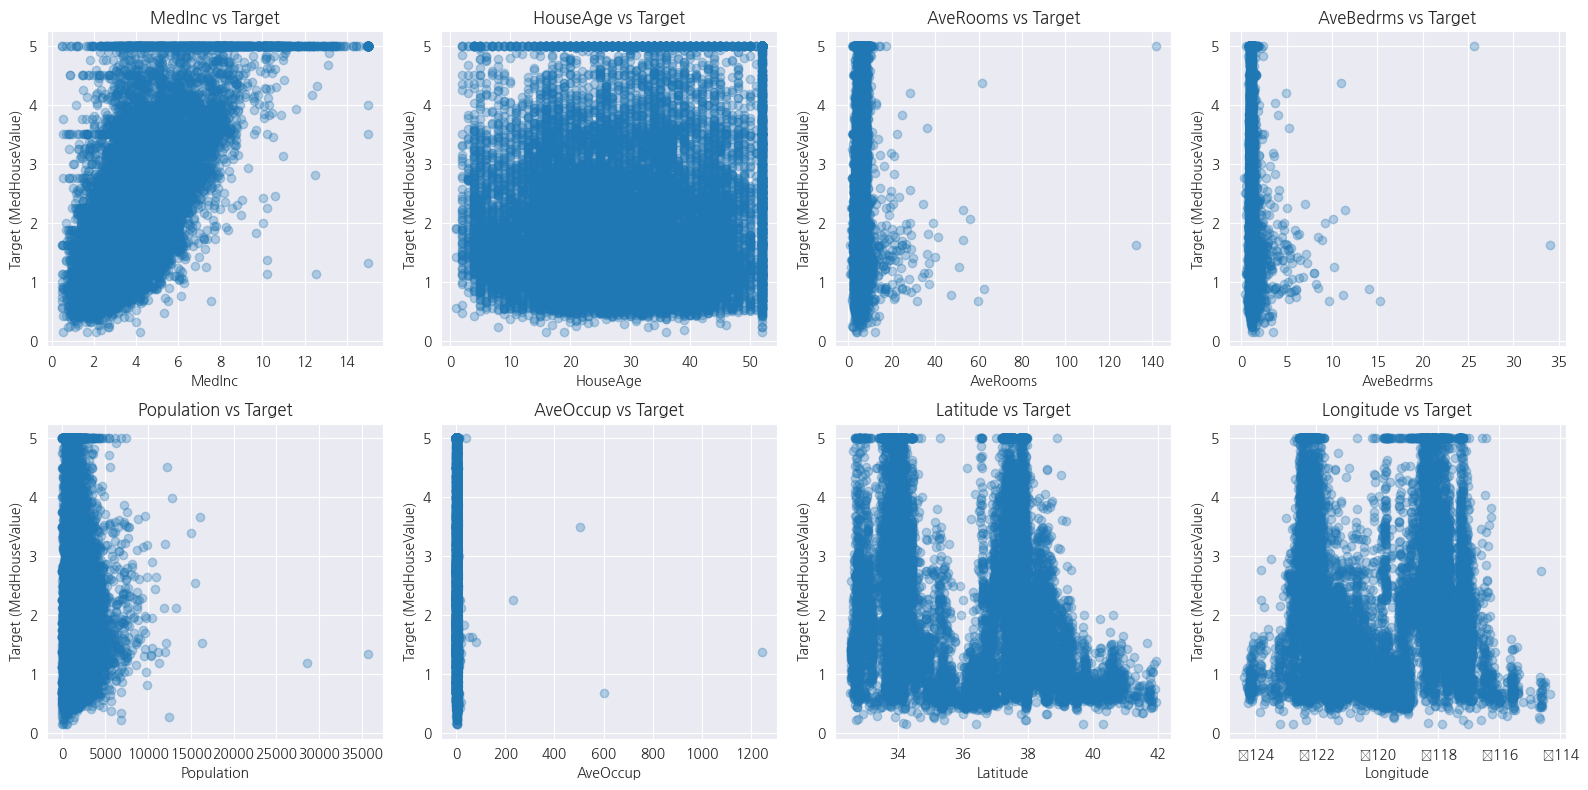

In [26]:
plt.figure(figsize=(16, 8))

for i in range(8):
    plt.subplot(2, 4, i+1)  # 2행 4열 subplot
    plt.scatter(X[:, i], y, alpha=0.3)
    plt.xlabel(feature_names[i])
    plt.ylabel("Target (MedHouseValue)")
    plt.title(f"{feature_names[i]} vs Target")

plt.tight_layout()
plt.show()

## 문제 3. 데이터 전처리

In [27]:
# train/test 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 표준화 (정규화)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 타깃 차원 맞추기
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

print("훈련 데이터 shape:", X_train.shape, y_train.shape)
print("테스트 데이터 shape:", X_test.shape, y_test.shape)

훈련 데이터 shape: (16512, 8) (16512, 1)
훈련 데이터 shape: (4128, 8) (4128, 1)


## 문제 4. 모델 정의 및 학습

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
516/516 - 1s - 1ms/step - loss: 2.3630 - val_loss: 0.5588
Epoch 2/50
516/516 - 0s - 884us/step - loss: 1.0308 - val_loss: 0.5450
Epoch 3/50
516/516 - 0s - 881us/step - loss: 0.7937 - val_loss: 0.5561
Epoch 4/50
516/516 - 0s - 874us/step - loss: 0.6286 - val_loss: 0.5718
Epoch 5/50
516/516 - 0s - 877us/step - loss: 0.5639 - val_loss: 0.5451
Epoch 6/50
516/516 - 0s - 871us/step - loss: 0.5315 - val_loss: 0.5452
Epoch 7/50
516/516 - 0s - 876us/step - loss: 0.5314 - val_loss: 0.5539
Epoch 8/50
516/516 - 0s - 861us/step - loss: 0.5238 - val_loss: 0.5517
Epoch 9/50
516/516 - 0s - 861us/step - loss: 0.5267 - val_loss: 0.5481
Epoch 10/50
516/516 - 0s - 885us/step - loss: 0.5232 - val_loss: 0.5606
Epoch 11/50
516/516 - 0s - 859us/step - loss: 0.5231 - val_loss: 0.5733
Epoch 12/50
516/516 - 0s - 848us/step - loss: 0.5354 - val_loss: 0.5857
Epoch 13/50
516/516 - 0s - 871us/step - loss: 0.5249 - val_loss: 0.5470
Epoch 14/50
516/516 - 0s - 856us/step - loss: 0.5251 - val_loss: 0.5526
Epo

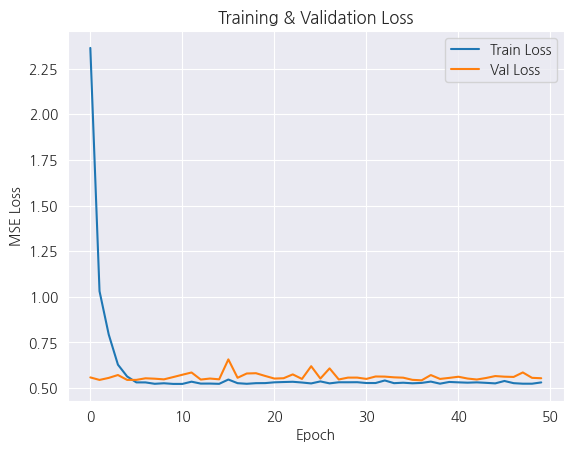

In [30]:
## 2. 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(8,)),
    tf.keras.layers.Dense(1)
])
model.summary()

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss='mse')

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=50,
                    verbose=2)

plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.title("Training & Validation Loss")
plt.show()

## 문제 4. 학습 결과 확인

학습된 가중치(W) shape: (8, 1)
학습된 절편(b): [2.013267]
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step


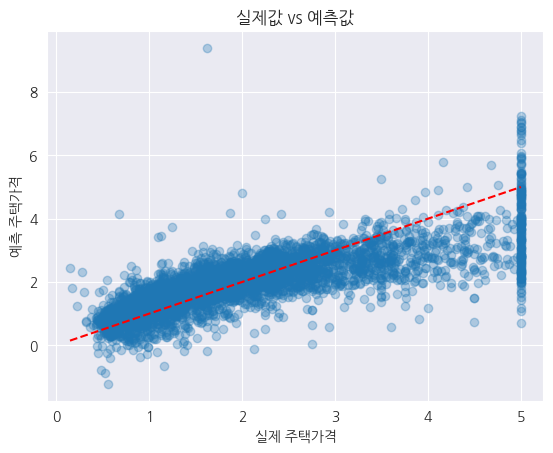

In [31]:
# ----------------------
# 7. 결과 확인
# ----------------------
W, b = model.layers[0].get_weights()
print("학습된 가중치(W) shape:", W.shape)
print("학습된 절편(b):", b)

# 테스트 데이터 예측
y_pred = model.predict(X_test)

# 산점도 (실제 vs 예측)
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("실제 주택가격")
plt.ylabel("예측 주택가격")
plt.title("실제값 vs 예측값")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')  # y=x 기준선
plt.show()

## 생각해보기
- Scaler를 사용하지 않으면 어떻게 되는가?

Scaler 값을 사용하지 않으면 다음과 같은 문제점이 발생한다.
1. 계수 크기의 불균형
-  선형회귀는 스케일에 무관하게 해를 찾을 수 있지만, 특성마다 단위가 다르기 때문에 회귀 계수의 크기가 왜곡된다.따라서, 계수의 상대적 크기를 해석하기 어렵다.
2. 정규화/규제 모델의 성능저하
- 스케일이 다르면 어떤변수는 규제에 과도하게 눌리고, 어떤 변수는 규제를 덜 받기 떄문에 학습이 불안정하거나 중요 특성이 손실되는 경우가 발생한다.
3. 경사하강법 기반 최적화에서 수렴속도 저하
- 보통 정규 방정식의 해를 사용하기 때문에 직접적으로는 영향이 적지만 경사하강법 기반 학습기를 쓰면 스케일이 크고 작은 특성간 학습률 차이 때문에 수렴 속도가 매우 느려지거나 발산 할수 있다.

위 실험에서는 특성값의 크기가 제각각이면, 경사하강법에서 특정특성은 기울기가 매우 커지고, 어떤 특성은 너무 작아져서 학습이 불안정하거나 느려진다.
따라서 최적화가 제대로 이루어지지 않아 예측 성능(R^2, MSE)이 떨어진다.

아래는 두 차이를 시각화 한 결과이다.

In [4]:
# ==========
# 안전/비교용 전체 코드 (WSL/로컬 공통)
# ==========

import os
import random
import numpy as np

# --- (WSL 안전) GUI 없는 백엔드 사용: 이미지 파일로 저장 ---
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt

import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

# ----------------------
# 0. 재현성 & TF 로그 최소화
# ----------------------
SEED = 42
os.environ["PYTHONHASHSEED"] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# ----------------------
# 1. 데이터 불러오기
# ----------------------
cali = fetch_california_housing()
X = cali.data.astype(np.float32)
y = cali.target.astype(np.float32)

# (안전) 원천 NaN 체크
if np.isnan(X).any() or np.isnan(y).any():
    # 캘리포니아 데이터셋은 보통 NaN이 없지만, 방어적으로 처리
    mask = np.isfinite(X).all(axis=1) & np.isfinite(y)
    X = X[mask]
    y = y[mask]

# ----------------------
# 2. train/test 분리
# ----------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y.reshape(-1, 1), test_size=0.2, random_state=SEED
)

# ----------------------
# 3. 모델 빌드 함수
# ----------------------
def build_linear_model(input_dim: int):
    # 순수 선형 회귀 (Dense(1))
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(shape=(input_dim,)),
        tf.keras.layers.Dense(1, kernel_initializer="glorot_uniform", bias_initializer="zeros"),
    ])
    return model

# 공통 콜백: NaN 발생 즉시 중단 + EarlyStopping(옵션)
callbacks_common = [
    tf.keras.callbacks.TerminateOnNaN(),
    tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
]

# ----------------------
# 4A. [With Scaler] 특성 표준화 + 선형회귀
# ----------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

model_scaled = build_linear_model(X_train.shape[1])

# 스케일되어 있으니 학습률을 조금 키워도 안정적
opt_scaled = tf.keras.optimizers.Adam(learning_rate=1e-2)

model_scaled.compile(optimizer=opt_scaled, loss="mse")
history_scaled = model_scaled.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=200, batch_size=128, verbose=0,
    callbacks=callbacks_common
)

y_pred_scaled = model_scaled.predict(X_test_scaled, verbose=0)

# ----------------------
# 4B. [Without Scaler] 스케일링 없음 + 안정화 장치
# ----------------------
model_raw = build_linear_model(X_train.shape[1])

# 스케일이 커서 발산 위험 → Adam(1e-3) + clipnorm로 안정화
opt_raw = tf.keras.optimizers.Adam(learning_rate=1e-3, clipnorm=1.0)

model_raw.compile(optimizer=opt_raw, loss="mse")
history_raw = model_raw.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=400, batch_size=128, verbose=0,
    callbacks=callbacks_common
)

y_pred_raw = model_raw.predict(X_test, verbose=0)

# ----------------------
# 5. NaN/Inf 가드 후 점수 계산
# ----------------------
def safe_metrics(y_true, y_pred, tag=""):
    mask = np.isfinite(y_true).ravel() & np.isfinite(y_pred).ravel()
    if mask.sum() < 2:
        print(f"[{tag}] 유효 샘플이 부족합니다. (mask.sum()={mask.sum()})")
        return np.nan, np.nan
    r2  = r2_score(y_true[mask], y_pred[mask])
    mse = mean_squared_error(y_true[mask], y_pred[mask])
    return r2, mse

r2_s, mse_s = safe_metrics(y_test, y_pred_scaled, "With Scaler")
r2_r, mse_r = safe_metrics(y_test, y_pred_raw, "Without Scaler")

print("[With Scaler]")
print("R2:", r2_s)
print("MSE:", mse_s)

print("\n[Without Scaler]")
print("R2:", r2_r)
print("MSE:", mse_r)

# ----------------------
# 6. 시각화 (비교) - 파일로 저장
# ----------------------
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(y_test, y_pred_scaled, alpha=0.3, s=12)
plt.title("With Scaler")
plt.xlabel("실제 주택가격")
plt.ylabel("예측 주택가격")

plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_raw, alpha=0.3, s=12)
plt.title("Without Scaler")
plt.xlabel("실제 주택가격")
plt.ylabel("예측 주택가격")

plt.tight_layout()
out_png = "california_tf_compare.png"
plt.savefig(out_png, dpi=150)
plt.close()
print(f"그래프 저장됨: {out_png}")


[With Scaler]
R2: 0.5734164118766785
MSE: 0.5589989423751831

[Without Scaler]
R2: -358030.6875
MSE: 469167.9375
그래프 저장됨: california_tf_compare.png


/tmp/ipykernel_10342/3705630445.py:147: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10342/3705630445.py:147: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10342/3705630445.py:147: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10342/3705630445.py:147: UserWarning: Glyph 53469 (\N{HANGUL SYLLABLE TAEG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10342/3705630445.py:147: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10342/3705630445.py:147: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10342/3705630445.py:147: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.


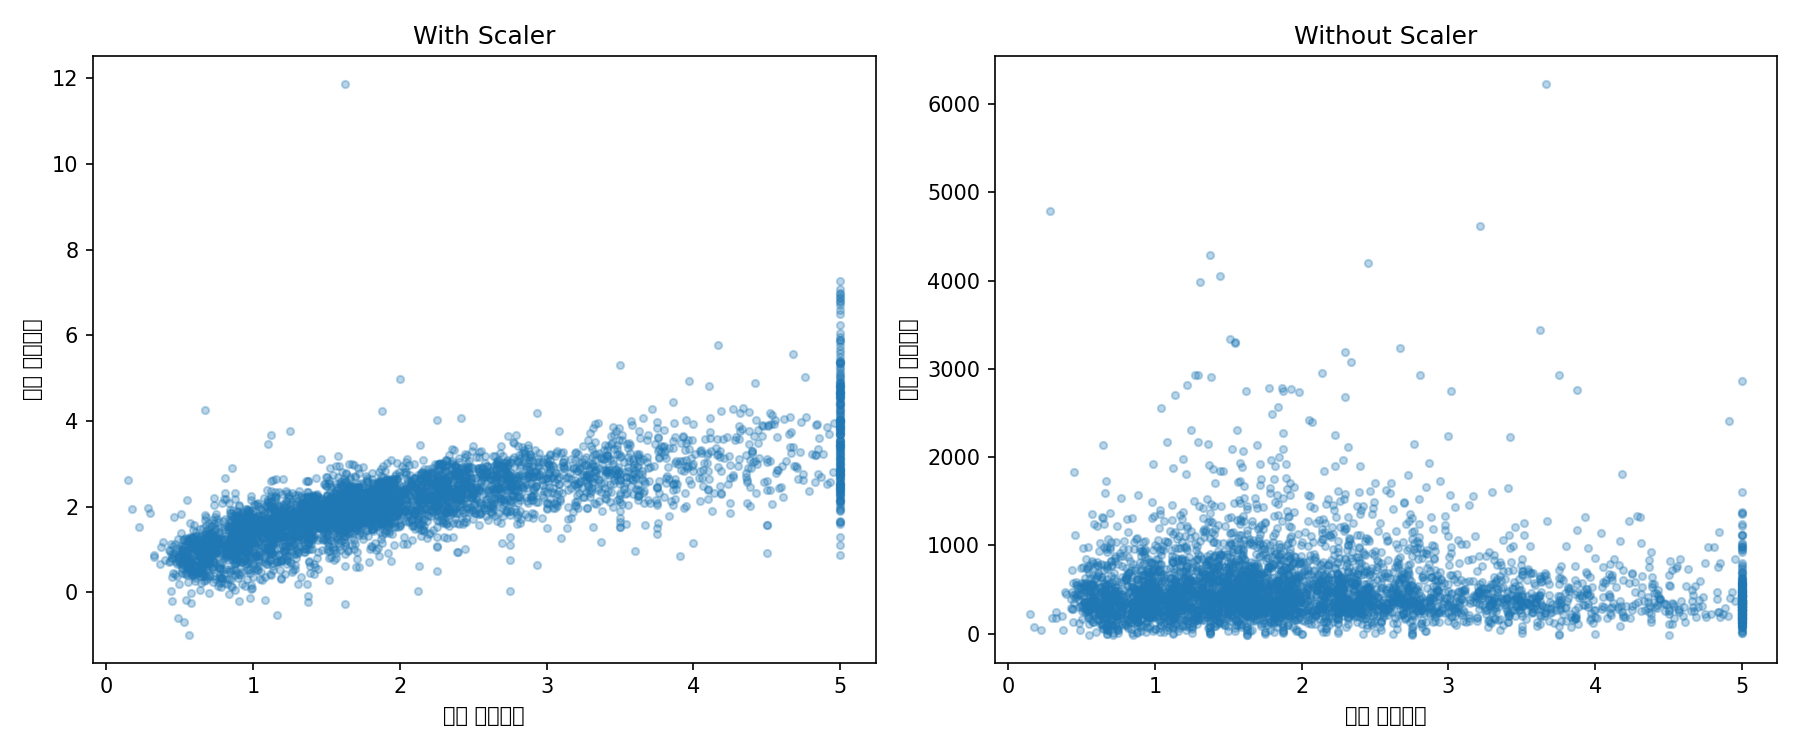